In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data_dup=data.duplicated().any()
print(data_dup)

True


In [6]:
data=data.drop_duplicates()

In [7]:
data.shape

(302, 14)

In [8]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [9]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
cont_val


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [11]:
cate_val.remove('sex')
cate_val.remove('target')

In [12]:
cate_val

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [13]:
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [14]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [18]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [19]:
x = data.drop('target',axis=1)

In [20]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [21]:
y=data['target']

In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

1.Logistic regression model

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log= LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred1=log.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

2.SVC

In [31]:
from sklearn import svm

In [32]:
svm=svm.SVC()

In [33]:
svm.fit(x_train,y_train)

SVC()

In [34]:
y_pred2=svm.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

3. KNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn=KNeighborsClassifier()

In [38]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred3=knn.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [41]:
score=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))
    

In [42]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [43]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)
    

0.8032786885245902

Non linear ML algorithms

In [44]:
data = pd.read_csv('heart.csv')

In [45]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
data=data.drop_duplicates()

In [47]:
data.shape

(302, 14)

In [48]:
x = data.drop('target',axis=1)

In [49]:
y=data['target']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

4.DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
 dt=DecisionTreeClassifier()

In [53]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred4=dt.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

5.RandomForestClassifier

In [56]:
 from sklearn.ensemble import RandomForestClassifier

In [57]:
rf=RandomForestClassifier()

In [58]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_pred5=rf.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

6.GradientBoostingClassifier

In [61]:
 from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gb=GradientBoostingClassifier()

In [63]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [64]:
y_pred6=gb.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [66]:
Final_data=pd.DataFrame({'Models':['LR','SMV','KNN','DT','RF','GB'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                               accuracy_score(y_test,y_pred2),
                               accuracy_score(y_test,y_pred3),
                               accuracy_score(y_test,y_pred4),
                               accuracy_score(y_test,y_pred5),
                               accuracy_score(y_test,y_pred6)]})

In [67]:
Final_data

,Models,ACC
0,LR,0.786885
1,SMV,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.836066
5,GB,0.803279


In [68]:
import seaborn as sns

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Models', ylabel='ACC'>

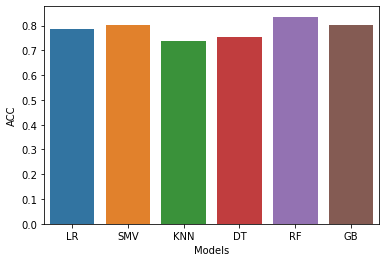

In [69]:
sns.barplot(Final_data['Models'],Final_data['ACC'])

In [70]:
x = data.drop('target',axis=1)
y=data['target']

In [71]:
x.shape

(302, 13)

In [72]:
 from sklearn.ensemble import RandomForestClassifier

In [73]:
rf=RandomForestClassifier()

In [74]:
rf.fit(x,y)

RandomForestClassifier()

Pradistion on New data

In [75]:
new_data=pd.DataFrame({
    'age':52, 
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212, 
    'fbs':1, 
    'restecg':1, 
    'thalach':168,
    'exang':0, 
    'oldpeak':1, 
    'slope':2, 
    'ca':2, 
    'thal':3,
},index=[0])

In [76]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,1,1,168,0,1,2,2,3


In [77]:
p=rf.predict(new_data)
if p[0] == 0 :
    print("No Heart Disease")
else:
    print(" Heart Disease")

No Heart Disease


Save model usign in joblib

In [78]:
import joblib

In [79]:
joblib.dump(rf,'Joblib_MOdel_Heart')

['Joblib_MOdel_Heart']

In [80]:
 model=joblib.load('Joblib_MOdel_Heart')

In [81]:
model.predict(new_data)

array([0])